# Math behind SVD and PCA

Please refer to our the linear algebra recap notebook of earlier in the course for a quick recap about linear algebra and eigenvectors. We'll repeat the section about eigenvectors in this notebook as well.

### Setup

#### Import and define code

In [1]:
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
def draw(vectors, labels=None, lim=1.6):
    colors = sb.color_palette()
    for vector, label in zip(vectors, labels):
        c = colors.pop()
        f = plt.plot([0, vector[0]], [0, vector[1]], ["-", ":"][label.find("M") > -1], label=label)
        f[0].figure.set_size_inches(3, 3) 
        plt.arrow(0, 0, vector[0], vector[1], head_width=0.2, fc=c, ec=c)
    plt.xlim(-lim, lim), plt.ylim(-lim, lim), plt.legend(loc="upper left", bbox_to_anchor=(1,1))

#### Setup data

Let's look at an arbitrary matrix _M_

In [3]:
M = np.random.random((2,2))
M

array([[ 0.89782125,  0.81277632],
       [ 0.541886  ,  0.59142641]])

We know we can multiply this matrix with any 2-dimensional vector, which whill give us another 2-dimensional vector.

In [4]:
v = np.random.random(2)
w = M.dot(v)

Let's draw both vectors

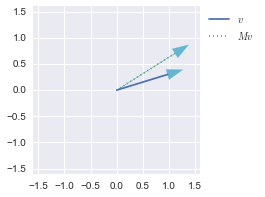

In [5]:
draw([v], ["$v$"])
draw([w], ["$Mv$"])

We see that the matrix $M$ both scales the vector $v$, .i.e., it makes it bigger or smaller, and rotates it.

### Eigenvectors and Eigenvalues

#### Eigenvectors

For this matrix _M_, we now try to find a vector _v_, along with a scalar $\lambda$, such that:
- $M v = \lambda v$

In fact, if we accept complex numbers, we know that each $n \times n$-matrix has
- $n$ such vectors, called _eigenvectors_, along with their
- respective scalars, called _eigenvalues_.

In [6]:
eigenvalues, eigenvectors = np.linalg.eig(M)
print eigenvalues
print eigenvectors

[ 1.42572702  0.06352064]
[[ 0.83863161 -0.6978066 ]
 [ 0.54469902  0.71628622]]


Let's check is if indeed holds that $M v = \lambda v$.

In [7]:
for i in xrange(len(eigenvalues)):
    v = eigenvectors[:,i]  # columns are eigenvectors
    print "Mv =", M.dot(v), "and lambda v =", eigenvalues[i] * v, ":", \
        np.isclose(M.dot(v), eigenvalues[i] * v).all()

Mv = [ 1.19565975  0.77659211] and lambda v = [ 1.19565975  0.77659211] : True
Mv = [-0.04432512  0.04549896] and lambda v = [-0.04432512  0.04549896] : True


Let's draw the eigenvectors.

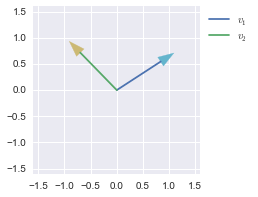

In [8]:
draw(eigenvectors.T, ["$v_1$", "$v_2$"])

#### Eigenvalues

What eigenvalues go with these eigenvectors?

In [9]:
print eigenvalues

[ 1.42572702  0.06352064]


Let's draw the images $Mv = \lambda v$.

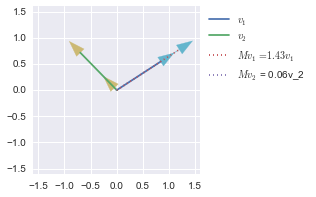

In [10]:
draw(eigenvectors.T, ["$v_1$", "$v_2$"])
draw(M.dot(eigenvectors).T, ["$Mv_1 = %.2fv_1$" % eigenvalues[0], "$Mv_2$ = %.2fv_2" % eigenvalues[1]])

In [11]:
print eigenvalues

[ 1.42572702  0.06352064]


We see that the eigenvectors are the dimensions along which $M$ only _scales_ vectors, but not rotates them.

### Singular Value Decomposition

#### SVD

If A is a $N \times n$ matrix, then the _Singular Value Decomposition_ (SVD) of $A$ is given by 

\begin{align}
A = U \Sigma V^{T},
\end{align}

where
- $U$ and $V$ are orthogonal matrices, meaning that $UU^T = \textbf{1}$ and $VV^T = \textbf{1}$ are identity matrices, and
- $\Sigma$ is a diagonal matrix, meaning that the values lie *only* on the diagonal. 

In particular, $U$ and $V$ are square matrices consisting of the eigenvectors of $AA^T$ and $A^TA$, respectively. Note that $\Sigma$ is _not_ necessarily a square matrix (since generally $N \neq n$). Its values are non-negative real numbers, and equal to the square root of the _singular values_ of $A$, which are defined as the eigenvalues of $AA^T$ (or $A^TA$, which are the same).

Let's see that in action. Let's start with some arbitraty matrix $M$ and compute its SVD.

In [12]:
M = np.random.random((5,3))
M

array([[ 0.99466043,  0.20954876,  0.15537406],
       [ 0.09864257,  0.74682847,  0.52119935],
       [ 0.44476089,  0.99187776,  0.89451446],
       [ 0.64998163,  0.11579491,  0.08561388],
       [ 0.81023573,  0.74270446,  0.00246527]])

In [13]:
U, s, VT = np.linalg.svd(M)  # returns matrix, array (only diagonal)
print U
print s
print VT

[[-0.39669546 -0.56802495 -0.40950255 -0.48625511 -0.34035864]
 [-0.37711531  0.45466445  0.1439675   0.19414499 -0.76983464]
 [-0.63509333  0.47380421 -0.32927019 -0.10930073  0.5017973 ]
 [-0.24915612 -0.38663772 -0.27073206  0.84380956  0.05587555]
 [-0.48476227 -0.31088381  0.79364118 -0.04361726  0.19127994]]
[ 2.06035529  1.05951639  0.40248757]
[[-0.61589387 -0.6715291  -0.41197501]
 [-0.76696282  0.39151618  0.50841235]
 [-0.18011881  0.62909756 -0.75617027]]


Note that `numpy`'s `linalg.svd` returns `U, s, VT`, where
- `s` is the actual diagonal of $\Sigma$ (not the entire matrix) and
- `VT` is the transpose of $V$.

Note that $\Sigma$ is a diagonal matrix, but not a square matrix.

In [14]:
S = np.zeros(M.shape)
S[:min(M.shape), :min(M.shape)] = np.diag(s)
S

array([[ 2.06035529,  0.        ,  0.        ],
       [ 0.        ,  1.05951639,  0.        ],
       [ 0.        ,  0.        ,  0.40248757],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ]])

Let's check if the SVD equation holds:

In [15]:
np.isclose(M, U.dot(S).dot(VT)).all()

True

Good!

Let's check if the values in $\Sigma$ are indeed the square roots of the eigenvalues of $AA^T$ resp. $A^TA$.  

We sort the eigenvalues, so we can compare them easily. We also round down to some decimal to clearly show the values that are nearly zero.

In [16]:
values1 = np.sort(np.linalg.eig(M.dot(M.T))[0])[::-1].round(7)
values2 = np.sort(np.linalg.eig(M.T.dot(M))[0])[::-1].round(7)
squares = np.sort(np.square(s))[::-1].round(7)
print values1
print values2
print squares

[ 4.2450639  1.122575   0.1619962  0.        -0.       ]
[ 4.2450639  1.122575   0.1619962]
[ 4.2450639  1.122575   0.1619962]


Let's inspect $U$ check if its columns are indeed equal to the eigenvectors of $AA^T$.  

We sort the eigenvectors according to their eigenvalue, so we can compare them easily again.

In [17]:
values, vectors = np.linalg.eig(M.dot(M.T))
vectors = vectors[:, values.argsort()[::-1]]
print U
print vectors
print U / vectors

[[-0.39669546 -0.56802495 -0.40950255 -0.48625511 -0.34035864]
 [-0.37711531  0.45466445  0.1439675   0.19414499 -0.76983464]
 [-0.63509333  0.47380421 -0.32927019 -0.10930073  0.5017973 ]
 [-0.24915612 -0.38663772 -0.27073206  0.84380956  0.05587555]
 [-0.48476227 -0.31088381  0.79364118 -0.04361726  0.19127994]]
[[-0.39669546 -0.56802495 -0.40950255  0.36611486 -0.2648063 ]
 [-0.37711531  0.45466445  0.1439675  -0.40984092 -0.79006639]
 [-0.63509333  0.47380421 -0.32927019  0.25064368  0.51243738]
 [-0.24915612 -0.38663772 -0.27073206 -0.79099883 -0.06936712]
 [-0.48476227 -0.31088381  0.79364118  0.09741115  0.19562428]]
[[ 1.          1.          1.         -1.32814906  1.2853117 ]
 [ 1.          1.          1.         -0.47370816  0.97439234]
 [ 1.          1.          1.         -0.43608015  0.97923634]
 [ 1.          1.          1.         -1.06676462 -0.80550491]
 [ 1.          1.          1.         -0.44776455  0.97779245]]


Note that they're equal up to a possible sign (+/-), since the orientation of eigenvectors and eigenvalues is arbitrary. Also note that the last eigenvectors are just noise as their corresponding eigenvalues are near-zero.

Let's inspect $V$ and $A^TA$.

In [18]:
V = VT.T
values, vectors = np.linalg.eig(M.T.dot(M))
vectors = vectors[:, values.argsort()[::-1]]
print V
print vectors
print V / vectors

[[-0.61589387 -0.76696282 -0.18011881]
 [-0.6715291   0.39151618  0.62909756]
 [-0.41197501  0.50841235 -0.75617027]]
[[ 0.61589387  0.76696282  0.18011881]
 [ 0.6715291  -0.39151618 -0.62909756]
 [ 0.41197501 -0.50841235  0.75617027]]
[[-1. -1. -1.]
 [-1. -1. -1.]
 [-1. -1. -1.]]


Great, that all seems to work!

#### Truncated SVD

How does this decomposition help us with data science?  As we saw in the example above already, if $\Sigma$ is not a square matrix, a lot of the column vectors in $U$ are irrelevant since they correspond to zero-value eigenvalues. Moreover, in practice, you'd have many eigenvalues that are very small. Since the values in $\Sigma$ are ordered from big to small, we could significantly reduce the dimensions of $\Sigma$ by limiting this matrix to an actual square matrix of dimension $k$, only containing the first $k$ rows and columns of $\Sigma$, and throwing away the smallest singular values.

\begin{align*}
A = U \Sigma V^{T} \approx U' \Sigma' V'^{T} \\
\end{align*}

We often ommit these accents and simply write $A = U \Sigma V^{T}$ when we in fact mean the _truncated SVD_ decomposition. Since we truncate only the smallest singular values, this loss in accuracy is only small if we choose $k$ large enough. This is a small price for a huge gain in insight in our data.

In [19]:
n_samples, n_features = M.shape
k = 2
M_svd = U[:n_samples, :k].dot(S[:k, :k]).dot(V[:n_features, :k].T)
print M
print M_svd 

[[ 0.99466043  0.20954876  0.15537406]
 [ 0.09864257  0.74682847  0.52119935]
 [ 0.44476089  0.99187776  0.89451446]
 [ 0.64998163  0.11579491  0.08561388]
 [ 0.81023573  0.74270446  0.00246527]]
[[ 0.96497331  0.31323642  0.03074232]
 [ 0.10907958  0.71037533  0.56501574]
 [ 0.42089026  1.07525027  0.79430136]
 [ 0.63035475  0.18434534  0.00321681]
 [ 0.86777121  0.54175138  0.24400927]]


How to measure the quality of this?

In [20]:
s_kept = s[:k]
print "M is a %dx%d-matrix, but we only choose the largest %d singular values" % (n_samples, n_features, k)
print "\nWe kept %d%% of our singular values, weigthed by their size:" % (100. * s_kept.sum() / s.sum())
print "- before:", s
print "- after: ", s_kept
diff = ((M_svd - M) / M).round(2)
print "\nRelative differences with original matrix (%.2f on average):" % diff.mean()
print diff

M is a 5x3-matrix, but we only choose the largest 2 singular values

We kept 88% of our singular values, weigthed by their size:
- before: [ 2.06035529  1.05951639  0.40248757]
- after:  [ 2.06035529  1.05951639]

Relative differences with original matrix (6.47 on average):
[[ -3.00000000e-02   4.90000000e-01  -8.00000000e-01]
 [  1.10000000e-01  -5.00000000e-02   8.00000000e-02]
 [ -5.00000000e-02   8.00000000e-02  -1.10000000e-01]
 [ -3.00000000e-02   5.90000000e-01  -9.60000000e-01]
 [  7.00000000e-02  -2.70000000e-01   9.79800000e+01]]


For an individual data point, the difference can be substantial, but for the population as a whole, we are pretty close to our initial matrix. 


#### Interpretation

Let's $A$ be our $N \times n$ feature matrix with $N$ samples and $n$ features, and let's write the SVD as follows, trunacted to some dimension $k < n$:

\begin{align}
A = U \Sigma V^{T}
\end{align}

Each of these matrices represents some grouping the data:
- $U$ ($N \times k$) represents how each datapoint relates to some latent concept,
- $V$ ($n \times k$) represents how each concept relates to each original feature, and
- $\Sigma$ ($k \times k$) represents the strength of each of those concepts in the dataset.

This reduces the number of dimensions from $n$ to $k$, since instead of modelling our data for each feature, we now model our data for each concept. Our intuition is that datapoints with similar relevant features will get similar concepts.

A very concrete example of this is text classification, in which case this method is often called _Latent semantic Analysis_ (LSA).  As always with Natural Language Processing (NLP), we transform our $N$ documents into a $N \times n$ feature matrix, where each column represents a certain word or n-gram (e.g., using `CountVectorizer`).  Please refer to the **notebook about LSA** in this folder for a clear demonstration about this.

### Principal Component Analysis

Principal Component Analysis (PCA) is directlty related to SVD by the following expression:

\begin{align*}
A &= U \Sigma V^{T} \\
AA^T &= (U \Sigma V^{T})(V \Sigma U^{T}) \\
&= U \Sigma^2 U^{T}
\end{align*}

Note that we used that $V$ is an orthogonal matrix, and hence $V^TV = \textbf{1}$.  Then we have:
- $AA^T$ is called the _covariance matrix_ (assuimg that all features $A$ were scaled with mean zero),
- $U$ is a square matrix consisting of the eigenvectors of $AA^T$, and
- $\Sigma^2$ is a square diagonal matrix with the eigenvalues of $AA^T$.

This means they are unique set of points that can be scaled by the covariance matrix but not rotated.  Therefore, they represent a new set of axes for our space.  This means our data can be shifted form our current axes or perspective to a new coordinate system - we can move our data points from samples in our feature space to samples in some underlying concept space. Pease refer to the **notebook about PCA** for an in-depth look into the math behind this.

### Further reading

- [Linear algebra explained in four pages](http://cnd.mcgill.ca/~ivan/miniref/linear_algebra_in_4_pages.pdf)
- [Latent Semantic Analysis](https://en.wikipedia.org/wiki/Latent_semantic_indexing) on Wikipedia